# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=932311d6e2f00289b7cc4ad01edf2b31&units=imperial&q=


In [4]:
# Loop through the list of cities and request for data on each
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print("Beginning Data Retrieval")
print("--------------------------------------------")
record = 0
set = 1
for index, city in enumerate(cities):
    record = record + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if record == 51:
        record = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {record} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Date.append(response['dt'])
        Country.append(response['sys']['country'])
        Cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        Lat.append(np.nan)
        Lng.append(np.nan)
        Max_Temp.append(np.nan)
        Humidity.append(np.nan)
        Wind_Speed.append(np.nan)
        Date.append(np.nan)
        Country.append(np.nan)
        Cloudiness.append(np.nan)

    #if set == 10:
    #   break
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | kologriv
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | ca mau
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | fort frances
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | oussouye
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kilindoni
Processing Record 19 of Set 1 | leshukonskoye
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | port macq

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Creating a dataframe to fill after looping in cities
cities_df = pd.DataFrame({
    'City': cities,
    "Lat": Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
    })
    
cities_df.to_csv('output')

len(cities_df)

608

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#This step i skipped because the max Humidity is 
cities_df['Humidity'].max()

100.0

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

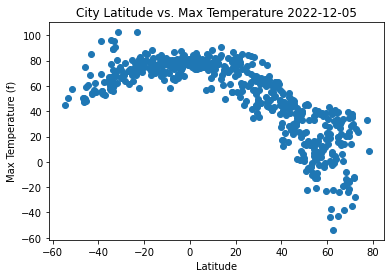

In [12]:
date_time = datetime.date(datetime.now())
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title(f'City Latitude vs. Max Temperature {date_time}')
plt.savefig("../output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

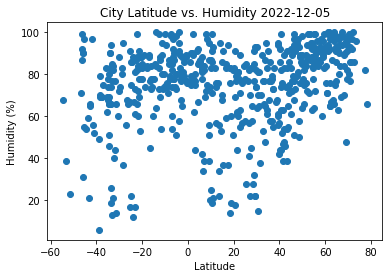

In [13]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity {date_time}')
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

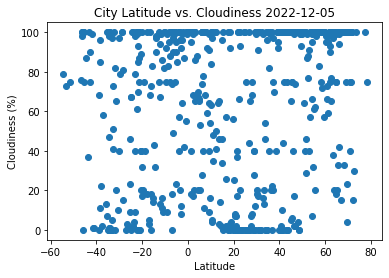

In [14]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness {date_time}')
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

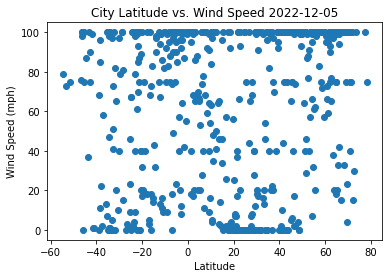

In [16]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed {date_time}')
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [18]:
# creating datasets of two different hemispheres
north_cities = cities_df.loc[cities_df['Lat'] >= 0]
south_cities = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.84


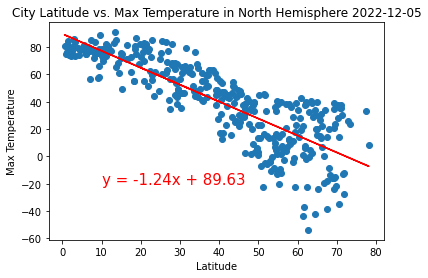

<Figure size 432x288 with 0 Axes>

In [20]:
x = north_cities['Lat']
y = north_cities['Max Temp']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temperature in North Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_max_temp_lat_lin.png", bbox_inches="tight")

In [ ]:
#After each pair of plots, explain what the linear regression is modeling. 
# Describe any relationships that you notice and any other findings you may uncover.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.55


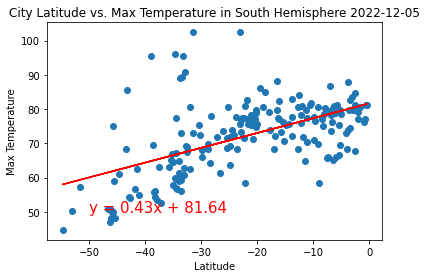

<Figure size 432x288 with 0 Axes>

In [21]:
x = south_cities['Lat']
y = south_cities['Max Temp']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temperature in South Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_max_temp_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.34


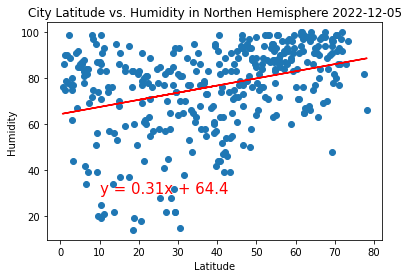

<Figure size 432x288 with 0 Axes>

In [22]:
x = north_cities['Lat']
y = north_cities['Humidity']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title(f'City Latitude vs. Humidity in Northen Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_humidity_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.35


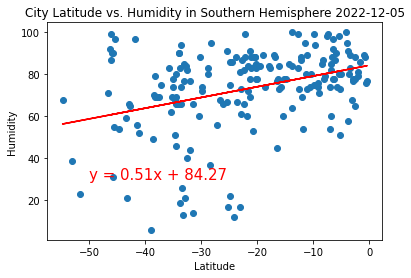

<Figure size 432x288 with 0 Axes>

In [23]:
x = south_cities['Lat']
y = south_cities['Humidity']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title(f'City Latitude vs. Humidity in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_humidity_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.27


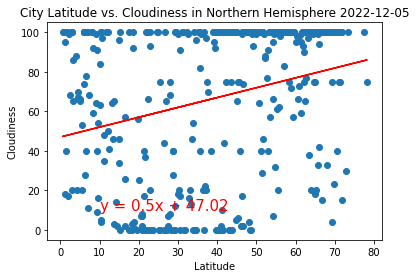

<Figure size 432x288 with 0 Axes>

In [24]:
x = north_cities['Lat']
y = north_cities['Cloudiness']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Cloudiness in Northern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_cloudiness_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.19


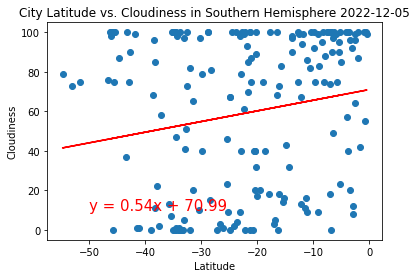

<Figure size 432x288 with 0 Axes>

In [25]:
x = south_cities['Lat']
y = south_cities['Cloudiness']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Cloudiness in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_cloudiness_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.19


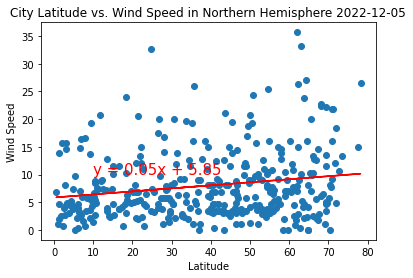

<Figure size 432x288 with 0 Axes>

In [26]:
x = north_cities['Lat']
y = north_cities['Wind Speed']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Wind Speed in Northern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_wind_speed_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.31


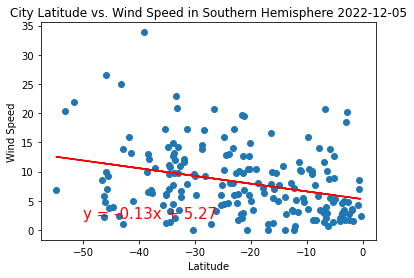

<Figure size 432x288 with 0 Axes>

In [27]:
x = south_cities['Lat']
y = south_cities['Wind Speed']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,2),fontsize=15,color="red")
plt.title(f'City Latitude vs. Wind Speed in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_wind_speed_lat_lin.png", bbox_inches="tight")